In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
import seaborn as sns
import pickle

from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
from datetime import datetime

In [5]:
test = pd.read_pickle("Test.pkl")

In [7]:
train = pd.read_pickle("Train.pkl")

In [6]:
test2 = test[test['freq_label'] ==0]
test3 = test[test['freq_label'] !=0]

In [8]:
train['pageviews_log'] = train['pageviews'].apply(lambda x: np.log(x))

In [9]:
test['pageviews_log'] = test['pageviews'].apply(lambda x: np.log(x))

In [10]:
S1 = set(test2[test2['transactionRevenueLog']>0].index)
S2 = set(train[train['transactionRevenueLog']>0].index)
len(S1.intersection(S2))

8

In [11]:
S1 = set(test2.index)
S2 = set(train.index)
len(S1.intersection(S2))

1432

In [12]:
S1 = set(test.index)
S2 = set(train.index)
inter = S1.intersection(S2)

In [113]:
test.loc[test.index.isin(inter)]['transactionRevenueLog'].sum()/test['transactionRevenueLog'].sum()

0.027632376324736207

In [105]:
len(train.index)

1328519

In [106]:
2598/len(train)*100

0.19555610420325187

In [4]:
train.head()

,(Other),Affiliates,Direct,Display,Organic Search,Paid Search,Referral,Social,Chrome,Firefox,...,pageviews,timeonsite,Revenue_Original,sessionQualityDim,Revenue_label,transactionRevenueLog,number_visits,freq_label,visit_per_month,visit_per_hour
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
0000593255797039768,0,0,0,0,1,0,0,0,1,0,...,11.0,54.0,0,2.0,0,0.0,2,1,1.0,2.0
0000844628216443785,0,0,0,0,1,0,0,0,1,0,...,14.0,189.0,0,2.0,0,0.0,2,1,1.0,1.0
000137710042816150,0,0,0,0,1,0,0,0,0,0,...,2.0,2.0,0,1.0,0,0.0,2,1,1.0,2.0
000170187170673177,0,0,0,0,0,0,1,0,1,0,...,6.0,1590.0,0,1.0,0,0.0,3,1,1.0,3.0
0002347517244240373,0,0,0,0,1,0,0,0,1,0,...,6.0,121.0,0,1.0,0,0.0,2,1,1.0,2.0


In [56]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2937183161395226723 to 4327728533284832353
Data columns (total 63 columns):
(Other)               20000 non-null int64
(not set)             20000 non-null int64
Affiliates            20000 non-null int64
Australasia           20000 non-null int64
Caribbean             20000 non-null int64
Central America       20000 non-null int64
Central Asia          20000 non-null int64
Chrome                20000 non-null int64
Chrome OS             20000 non-null int64
Direct                20000 non-null int64
Display               20000 non-null int64
Eastern Africa        20000 non-null int64
Eastern Asia          20000 non-null int64
Eastern Europe        20000 non-null int64
Even                  20000 non-null int64
Firefox               20000 non-null int64
Friday                20000 non-null int64
Macintosh             20000 non-null int64
Melanesia             20000 non-null int64
Micronesian Region    20000 non-null int64
Midd

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296530 entries, 0000450284137157873 to 6945787574691873152
Data columns (total 62 columns):
(Other)               296530 non-null int64
(not set)             296530 non-null int64
Affiliates            296530 non-null int64
Australasia           296530 non-null int64
Caribbean             296530 non-null int64
Central America       296530 non-null int64
Central Asia          296530 non-null int64
Chrome                296530 non-null int64
Chrome OS             296530 non-null int64
Direct                296530 non-null int64
Display               296530 non-null int64
Eastern Africa        296530 non-null int64
Eastern Asia          296530 non-null int64
Eastern Europe        296530 non-null int64
Even                  296530 non-null int64
Firefox               296530 non-null int64
Friday                296530 non-null int64
Macintosh             296530 non-null int64
Melanesia             296530 non-null int64
Micronesian Region    24346

In [60]:
test = test.drop('freq_label', axis = 1)

In [120]:
DataR = train[train['Revenue_label'] == 1]
DataNonR = train[train['Revenue_label'] != 1]

In [9]:
true_ratio = len(DataR)/len(train)

In [10]:
1- true_ratio

0.9878210247651709

In [121]:
from scipy.stats import iqr
Q = list((DataR['transactionRevenueLog']).describe())
Q1 = Q[4]
Q3 = Q[6]
iqrange = iqr(DataR['transactionRevenueLog'])
Outlierlow = Q1-1.5*iqrange
Outlierhigh = Q3+1.5*iqrange
temp = DataR[DataR['transactionRevenueLog'] < Outlierhigh]#
Data_nonOutlier = temp[temp['transactionRevenueLog'] >= Outlierlow]

In [122]:
len(DataR), len(Data_nonOutlier)

(16180, 15698)

In [123]:
def returnlabel(data_frame):
    label = data_frame[["transactionRevenueLog","Revenue_label"]]
    data_frame = data_frame.drop(["transactionRevenueLog","Revenue_Original","Revenue_label"],axis = 1)
    
    return data_frame, label

In [124]:
#Test

In [125]:
Data_Rframe, Rlabel = returnlabel(Data_nonOutlier)

In [126]:
X_DR, X_test, y_DR, y_test = train_test_split(Data_Rframe, Rlabel, test_size=0.33)

Test Data

In [127]:
testR = X_test.join(y_test)

In [128]:
testratio = 0.985

In [129]:
testNonR = DataNonR.sample(n = int(len(testR)/(1-testratio)))
#Data_nonOutlier.sample(n = int(total_n*Rratio))
#result = result.sample(frac=1)

In [130]:
len(testR)/(len(testNonR) +len(testR))*100

1.477836727708369

In [131]:
frames = [testNonR, testR]
test = pd.concat(frames)
test = test.sample(frac=1)

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [145]:
test_label = test[["transactionRevenueLog","Revenue_label","Revenue_Original"]]

test = test.drop(["transactionRevenueLog","Revenue_Original",'Revenue_label'],axis = 1)
#"Revenue_label"

Training Data

In [133]:
total_n = 20000
int(total_n*0.985)
Rratio = 1-0.989

In [134]:
sampleNon = DataNonR.sample(n = int(total_n*(1-Rratio)))
sampleR = X_DR.join(y_DR).sample(n = int(total_n*Rratio))
#Data_nonOutlier.sample(n = int(total_n*Rratio))
#result = result.sample(frac=1)

In [135]:
len(sampleR)/(len(sampleNon) +len(sampleR))*100

1.0999999999999999

In [136]:
frames = [sampleR, sampleNon]
result = pd.concat(frames)
result = result.sample(frac=1)

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [137]:
revenuelabel = result["transactionRevenueLog"]

result = result.drop(["transactionRevenueLog","Revenue_Original","Revenue_label"],axis = 1)

#"Revenue_label"

In [138]:
y_label = revenuelabel

In [31]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [32]:
xgb = XGBRegressor(learning_rate=0.01, objective='reg:linear',
                    silent=True, nthread=4,min_child_weight = 5,subsample =1,gamma = 0.5)

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators' : [300,600,800,1000],
        }

In [33]:
folds = 5
param_comb = 5

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, \
                                   scoring='neg_mean_squared_error', n_jobs=4, \
                                   cv=5, verbose=3, random_state=1001 )

In [139]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(result,y_label)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  1.2min finished



 Time taken: 0 hours 1 minutes and 23.12 seconds.


In [35]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print (params, np.sqrt(-mean_score),' ',-mean_score)

{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 3, 'gamma': 2, 'colsample_bytree': 0.8} 1.1868971676896838   1.4087248866697932
{'subsample': 1.0, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 0.8} 1.1560103176412417   1.3363598544930044
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 10, 'max_depth': 3, 'gamma': 1, 'colsample_bytree': 1.0} 1.1839506208366979   1.4017390725796024
{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 4, 'gamma': 1.5, 'colsample_bytree': 0.6} 1.1236786424058547   1.2626536913990647
{'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 5, 'colsample_bytree': 1.0} 1.1678955983665475   1.363980128683956


In [44]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print(-random_search.best_score_,np.sqrt(-random_search.best_score_))


 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.5, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=10, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)
1.2626536913990647 1.1236786424058547


In [140]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print(-random_search.best_score_,np.sqrt(-random_search.best_score_))


 Best estimator:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.5, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=10, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)
1.3622012798947878 1.1671337883442445


In [147]:
test_pred_3 = random_search.best_estimator_.predict(test[result.columns])

In [41]:
def engineer_prediction(df_test):
    df_test[df_test['hits'] == 1].PredictedLogRevenue = 0
    df_test[df_test['timeonsite'] == 0].PredictedLogRevenue = 0
    return df_test
 

In [42]:
test['PredictedLogRevenue'] =test_pred_3
test = engineer_prediction(test)

/Users/JasonLi/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


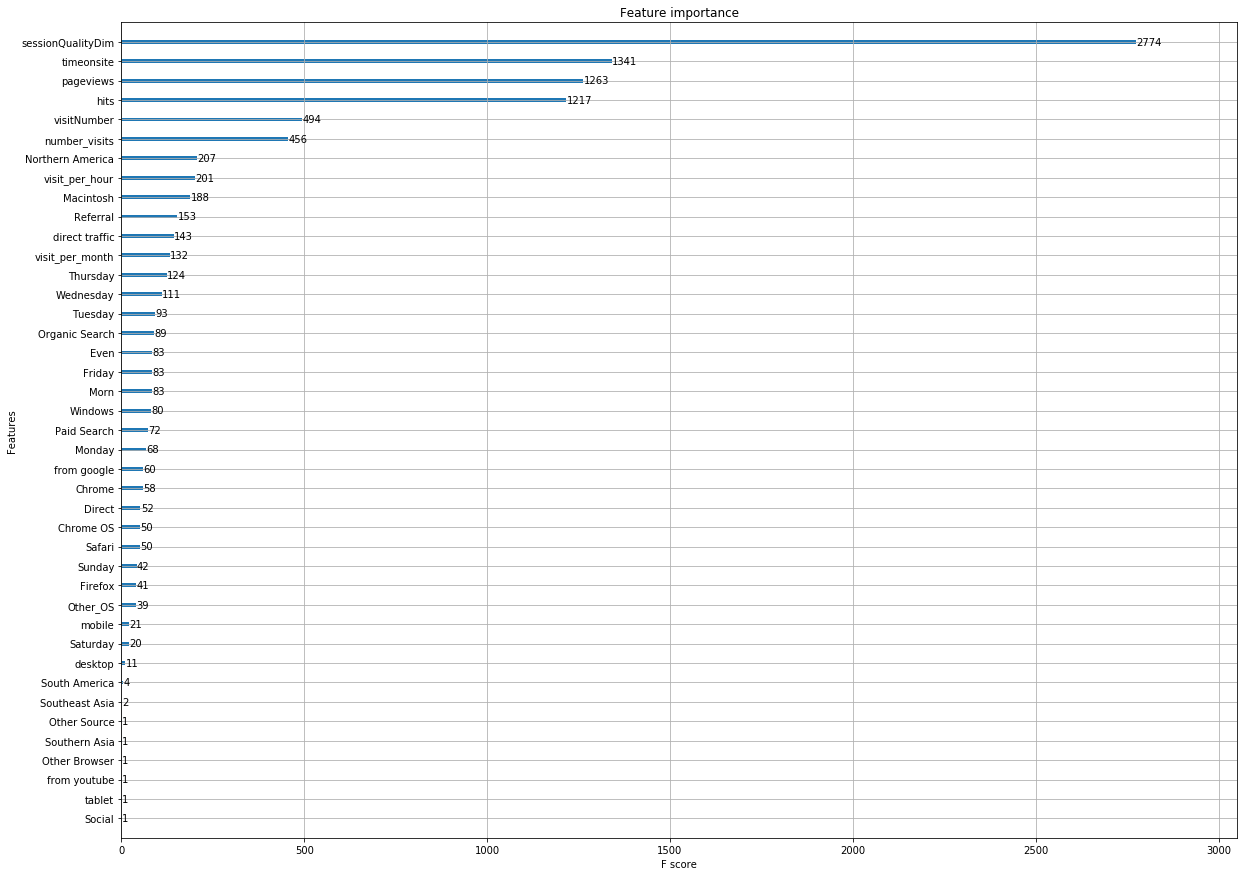

In [42]:
fig, ax = plt.subplots(figsize=(20,15))
plot_importance(random_search.best_estimator_, ax = ax)

In [148]:
np.sqrt(mean_squared_error(test_label["transactionRevenueLog"], test_pred_3))

1.886598815617249

In [46]:
#pickle.dump(random_search.best_estimator_, open("xgb_boost_model.dat", "wb"))

In [83]:
#train_label = train[["transactionRevenueLog","Revenue_label","Revenue_Original"]]

#train = train.drop(["transactionRevenueLog","Revenue_Original",'Revenue_label'],axis = 1)
#"Revenue_label"

In [84]:
#loaded_model = pickle.load(open("xgb_boost_model.dat", "rb"))

In [2]:
#loaded_model.fit(train, train_label["transactionRevenueLog"])

In [87]:
#test_pred = loaded_model.predict(test[train.columns])

In [1]:
#np.sqrt(mean_squared_error(test_label["transactionRevenueLog"], test_pred))